In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [6]:
df_full = pd.read_csv('complaints_processed.csv')
df_full.head(10)

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
5,5,credit_reporting,payment history missing credit report made mis...
6,6,credit_reporting,va date complaint experian credit bureau invol...
7,7,credit_reporting,account reported abbreviated name full name se...
8,8,credit_reporting,account reported abbreviated name full name se...
9,9,credit_reporting,usdoexxxx account reported abbreviated name fu...


In [7]:
df_full['product'].nunique()

5

In [8]:
print('Shape of data',df_full.shape)

Shape of data (162421, 3)


In [13]:
print('Before dropping the nulls')
display('Null count', df.isna().sum())
print('Total rows of data', len(df))
df.dropna(inplace=True)
print('='*80)
print('After dropping the nulls')
display('Null count', df.isna().sum())
print('Total rows of data', len(df))

Before dropping the nulls


'Null count'

narrative    10
product       0
dtype: int64

Total rows of data 162421
After dropping the nulls


C:\Users\yoges\AppData\Local\Temp\ipykernel_13476\3675574101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


'Null count'

narrative    0
product      0
dtype: int64

Total rows of data 162411


In [14]:
df=df.head(1000).reset_index(drop=True)
display(df.head())
display(df.tail())

,narrative,product
0,purchase order day shipping amount receive pro...,credit_card
1,forwarded message date tue subject please inve...,credit_card
2,forwarded message cc sent friday pdt subject f...,retail_banking
3,payment history missing credit report speciali...,credit_reporting
4,payment history missing credit report made mis...,credit_reporting


,narrative,product
995,bank america add hard inquiry credit report pe...,credit_reporting
996,opened premium checking bundle advertised main...,retail_banking
997,opened premium checking bundle advertised main...,retail_banking
998,original account number date original account ...,debt_collection
999,please provide actual credit card contract upo...,debt_collection


In [17]:
df['narrative'][0]

'purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called 

In [21]:
df['product'].value_counts()

credit_reporting       619
debt_collection        114
mortgages_and_loans    109
retail_banking          80
credit_card             78
Name: product, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split( df['narrative'], df['product'],  test_size=0.25, random_state=0, stratify=df['product'])
print(f'Training utterances: {len(X_train)} of shape {X_train.shape}')
print(f'Validation utterances: {len(X_test)} of shape {X_test.shape}')


Training utterances: 750 of shape (750,)
Validation utterances: 250 of shape (250,)


In [25]:
vectorizer = TfidfVectorizer(stop_words= 'english')
# convert the documents into a matrix
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)
X_train_vec, X_test_vec

(<750x4616 sparse matrix of type '<class 'numpy.float64'>'
 	with 61888 stored elements in Compressed Sparse Row format>,
 <250x4616 sparse matrix of type '<class 'numpy.float64'>'
 	with 19966 stored elements in Compressed Sparse Row format>)

In [26]:
from sklearn.feature_selection import SelectKBest, chi2

n_features=100

ch2 = SelectKBest(chi2, k=n_features)
X_train_sp = ch2.fit_transform(X_train_vec, y_train)
X_test_sp  = ch2.transform(X_test_vec)

X_train_sp, X_test_sp

(<750x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 6002 stored elements in Compressed Sparse Row format>,
 <250x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 1994 stored elements in Compressed Sparse Row format>)

In [27]:
cols = list(range(n_features))

X_train_dense = pd.DataFrame(data=X_train_sp.toarray(), columns=cols)
X_test_dense  = pd.DataFrame(data=X_test_sp.toarray(), columns=cols)
print(X_train_dense.shape, X_test_dense.shape)
X_train_dense

(750, 100) (250, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.257168,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.131667,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.173167,0.000000,0.02196,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.148599,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.08686,0.0,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
746,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.00000,0.108912,0.63619,0.0,0.0,0.0,0.0,0.0
747,0.0,0.074937,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.076733,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
748,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [29]:
encoder = LabelEncoder()
y_train_num  = encoder.fit_transform(y_train)
y_test_num   = encoder.transform(y_test)
y_train_num.min(), y_train_num.max(), y_test_num.min(), y_test_num.max() 

(0, 4, 0, 4)

In [30]:
n=5
print('Text   Encoding')
print('-'*50)
for p,q in zip(y_train[:n].values,y_train_num):
    print(f'{q}      {p}')

Text   Encoding
--------------------------------------------------
1      credit_reporting
4      retail_banking
1      credit_reporting
1      credit_reporting
2      debt_collection


In [33]:
rf_model  = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs = -1)
scores = cross_val_score(rf_model,X_train_dense,y_train_num,cv=5,n_jobs = -1,scoring = 'accuracy')
scores.mean()

0.8386666666666667

In [34]:
rf_model.fit(X_train_dense, y_train_num)
preds=rf_model.predict(X_test_dense)
print('Predictions ready')

Predictions ready


In [35]:
report = pd.DataFrame(columns=['Complaint','Actual Product','Prediction'])
report['Complaint']      = X_test
report['Actual Product'] = y_test 
report['Prediction']     = preds
report

,Complaint,Actual Product,Prediction
65,fire house saved experienced damage insurance ...,mortgages_and_loans,3
68,hello name trying reach several time get probl...,credit_reporting,1
670,stayed weekend gentleman checked charged card ...,credit_card,0
834,two inquiry file need remove never applied cre...,credit_reporting,1
734,lj ross company never receive written document...,debt_collection,1
...,...,...,...
267,block except otherwise provided section consum...,credit_reporting,1
158,true identity theft im member data breach file...,credit_reporting,1
82,fidelity capital holding inc acquired consumer...,debt_collection,4
361,except otherwise provided section consumer rep...,credit_reporting,1


In [36]:
report = pd.DataFrame(columns=['Complaint','Actual Product','Prediction'])
report['Complaint']      = X_test
report['Actual Product'] = y_test 
report['Prediction']     = preds
report

,Complaint,Actual Product,Prediction
65,fire house saved experienced damage insurance ...,mortgages_and_loans,3
68,hello name trying reach several time get probl...,credit_reporting,1
670,stayed weekend gentleman checked charged card ...,credit_card,0
834,two inquiry file need remove never applied cre...,credit_reporting,1
734,lj ross company never receive written document...,debt_collection,1
...,...,...,...
267,block except otherwise provided section consum...,credit_reporting,1
158,true identity theft im member data breach file...,credit_reporting,1
82,fidelity capital holding inc acquired consumer...,debt_collection,4
361,except otherwise provided section consumer rep...,credit_reporting,1


In [38]:
report['Correct'] = (report['Actual Product'] == report['Prediction']).astype('int')
display(report)
print(f'Accuracy: {100*report.Correct.sum()/report.Correct.count()} %')

,Complaint,Actual Product,Prediction,Correct
65,fire house saved experienced damage insurance ...,mortgages_and_loans,3,0
68,hello name trying reach several time get probl...,credit_reporting,1,0
670,stayed weekend gentleman checked charged card ...,credit_card,0,0
834,two inquiry file need remove never applied cre...,credit_reporting,1,0
734,lj ross company never receive written document...,debt_collection,1,0
...,...,...,...,...
267,block except otherwise provided section consum...,credit_reporting,1,0
158,true identity theft im member data breach file...,credit_reporting,1,0
82,fidelity capital holding inc acquired consumer...,debt_collection,4,0
361,except otherwise provided section consumer rep...,credit_reporting,1,0


Accuracy: 0.0 %


In [42]:
r = pd.DataFrame()
r['Correctly Predicted'] = report.groupby('Actual Product').sum()['Correct']
r['Overall Predicted']   = report.groupby('Prediction').count()['Correct']
r['Actuals']             = report.groupby('Actual Product').count()['Correct']
r

C:\Users\yoges\AppData\Local\Temp\ipykernel_13476\1135469796.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r['Correctly Predicted'] = report.groupby('Actual Product').sum()['Correct']


,Correctly Predicted,Overall Predicted,Actuals
Actual Product,,,
credit_card,0,NaN,20
credit_reporting,0,NaN,155
debt_collection,0,NaN,28
mortgages_and_loans,0,NaN,27
retail_banking,0,NaN,20


In [40]:
r = pd.DataFrame()
r['Correctly Predicted'] = report.groupby('Actual Product').sum()['Correct']
r['Overall Predicted']   = report.groupby('Prediction').count()['Correct']
r['Actuals']             = report.groupby('Actual Product').count()['Correct']
r

C:\Users\yoges\AppData\Local\Temp\ipykernel_13476\1135469796.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  r['Correctly Predicted'] = report.groupby('Actual Product').sum()['Correct']


,Correctly Predicted,Overall Predicted,Actuals
Actual Product,,,
credit_card,0,NaN,20
credit_reporting,0,NaN,155
debt_collection,0,NaN,28
mortgages_and_loans,0,NaN,27
retail_banking,0,NaN,20


In [43]:
print(rf_model.score(X_test_dense, y_test_num))

0.836


In [45]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,labels,size=10, rotate_labels=False):
    '''
    This function receives a confusion matrix object and plots it out using seaborn
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    font_specs = {"size": 20, 'fontweight':'bold'}
    title_specs= {"size": 16, 'fontweight':'bold'}
    figsize = size
    fig, ax = plt.subplots(figsize = (figsize,figsize), facecolor = '#ebebeb', frameon = True, edgecolor = 'black')
    ax = sns.heatmap(cm,annot=True, cbar = False, cmap = 'Blues',linewidths=5,
                  linecolor='#ebebeb', annot_kws=font_specs, fmt='g')
    plt.xlabel('Predicted', fontdict = font_specs, labelpad=-(figsize*65))
    plt.ylabel('Actual', fontdict = font_specs, labelpad=15)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    if rotate_labels:
        ax.set_xticklabels(labels, rotation=90, ha='center')    
        ax.set_yticklabels(labels, rotation=0, ha='right')    
    
    ax.tick_params(labelbottom=False, labeltop=True, labelsize = 12, colors ='#151736' )
    plt.title('CONFUSION MATRIX',loc = 'right', pad = figsize*4 , fontdict = title_specs)
    plt.show()
print('custom function defined') 

custom function defined


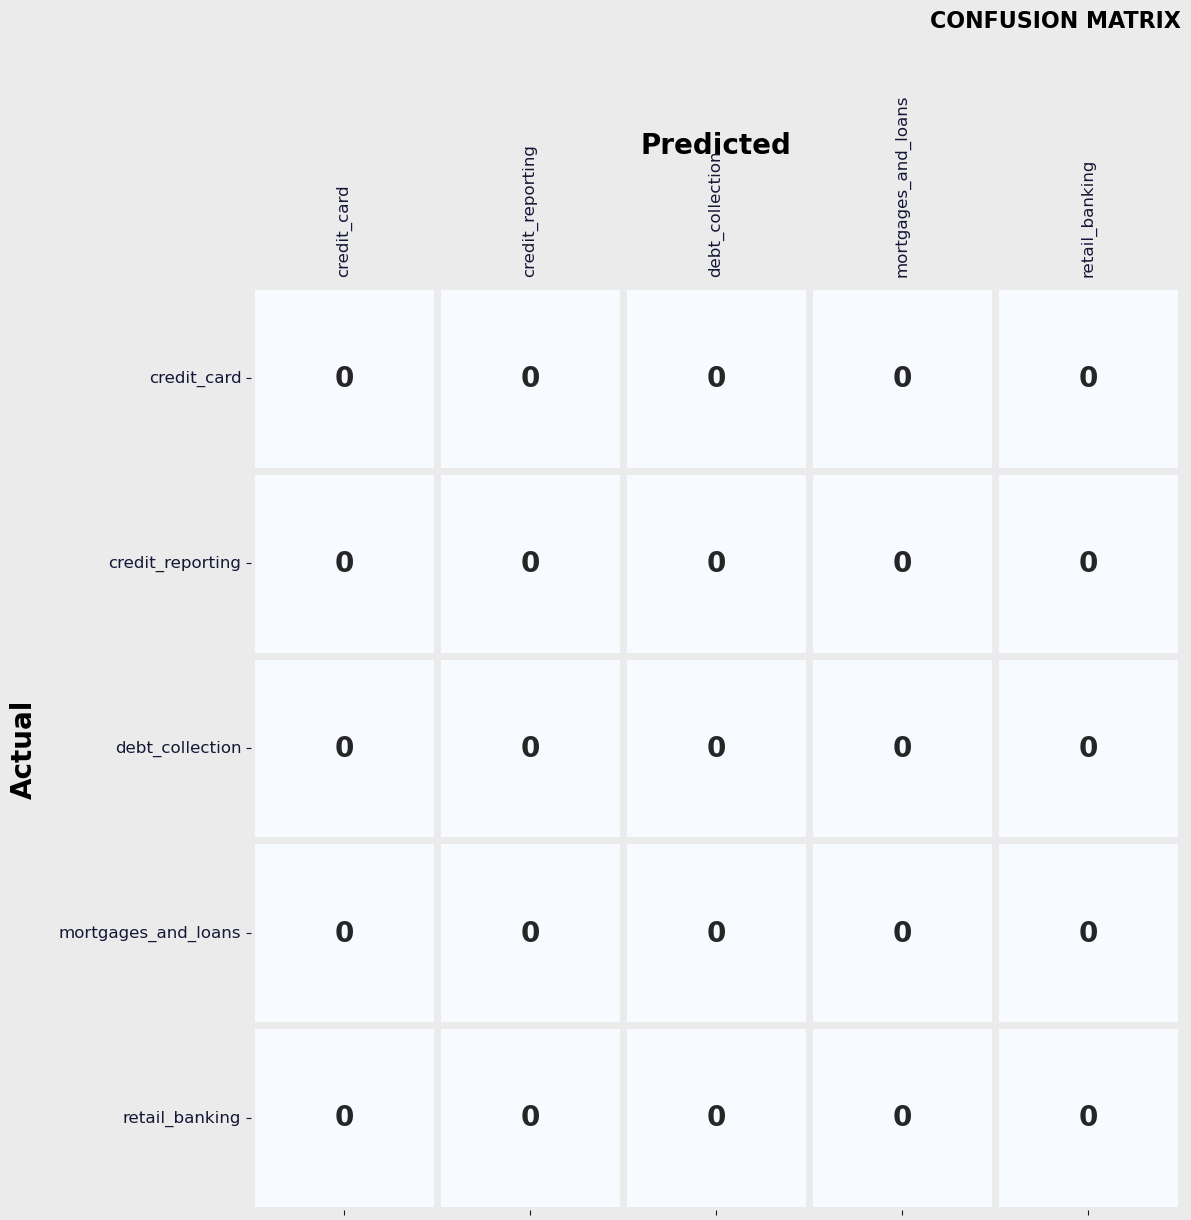

In [46]:
cm = confusion_matrix(y_test, preds, labels=encoder.classes_)
plot_confusion_matrix(cm=cm,labels=encoder.classes_, size=12, rotate_labels=True)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

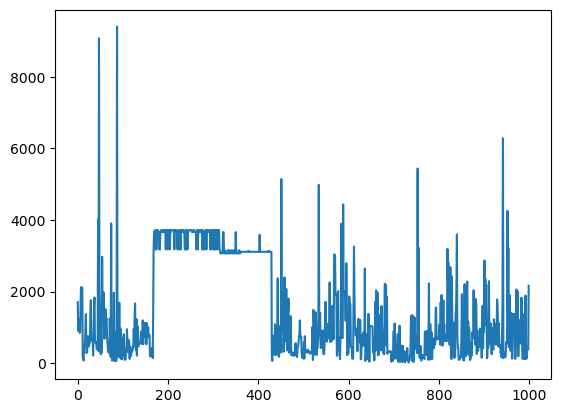

In [62]:
word_length = [len(x) for x in df['narrative']]
plt.plot(word_length)

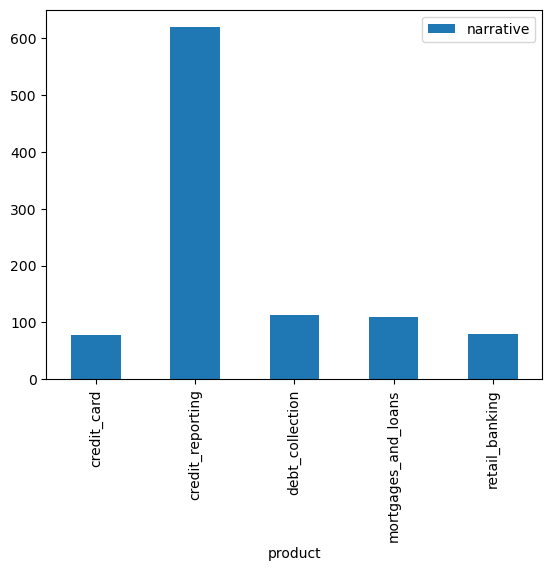

In [63]:
df.groupby('product').count().plot(kind='bar')
plt.show()

In [71]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding 

In [77]:
max_words = 2500 
max_sequence_length = 170
embedding_dim = 32 

In [78]:
model = Sequential()
model.add(Embedding(max_words, 
                   embedding_dim,
                   input_length=max_sequence_length))

# Bidirectional LSTM 
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.4, recurrent_dropout=0)))   

model.add(GlobalMaxPool1D())

model.add(Dense(5,activation='softmax'))  

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 170, 32)           80000     
                                                                 
 bidirectional (Bidirection  (None, 170, 32)           6272      
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 86437 (337.64 KB)
Trainable params: 86437 (337.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
